The goal of this notebook is to examine the differences between ASV between one day and the following day in a deconstruction pattern 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import hctmicrobiomemskcc.dataloading.dataloading as hct_data
import hctmicrobiomemskcc.tools.microbiotatools as hct_tools

# data generated from rotational_project1.jpynb
df = pd.read_csv('/Users/brian/Documents/2021Spring/Jonas_Rotation/hctmicrobiome/notebooks/df_deconstruction.csv')
df_sample = pd.read_csv('/Users/brian/Documents/2021Spring/Jonas_Rotation/jupyterlab/hct_data/samples/tblASVsamples.csv')
df_tax = pd.read_csv('/Users/brian/Documents/2021Spring/Jonas_Rotation/jupyterlab/hct_data/taxonomy/tblASVtaxonomy_silva_v4v5_filter.csv')



#cleaning up df, setting patientID as index, dropping duplicate column 
df=df.set_index('PatientID')
df=df.drop(['Abundant_color'], axis=1)

df_kmeans=df[['S1_score','S2_score','S3_score']]
              
# create a kmeans object
kmeans = KMeans(n_clusters = 3)
# doing the kmeans
kmeans.fit(df_kmeans)
clusters = kmeans.cluster_centers_
# predicting 
y_km = kmeans.fit_predict(df_kmeans)
df['kmeans_prediction'] = y_km


data_dir = '/Users/brian/Documents/2021Spring/Jonas_Rotation/jupyterlab/hct_data'
df_ASV, df_colors, df_counts, df_stool = hct_data.load_microbiome_tables(local_dir=data_dir)

Attempting to load data remotely... 
Phylum
Class
Order
Family
Genus
removing rows from the taxonomy table that correspond to eukaryotes, mitochondria, cloroplats, etc.
Removing counts of 16S sequences with unknown taxonomy / corresponding to chloroplasts, mitochondria, Archaea, or other non bacterial sources.
Data sucessfully loaded.


In [2]:
from hctmicrobiomemskcc.dataloading import dataloading as dl
df_meta = dl.load_dataset_by_name('metadata')
df_blood = dl.load_dataset_by_name('blood')
df_drugs = dl.load_dataset_by_name('drugs')


Attempting to load data remotely... 
Data sucessfully loaded.
Attempting to load data remotely... 
Data sucessfully loaded.
Attempting to load data remotely... 
Data sucessfully loaded.


In [3]:
df_blood.groupby('PatientID').mean()

,Day,ImmatureMonocytes_unit_K_per_uL,SezaryCells_unit_K_per_uL,VariantLymphocytes_unit_K_per_uL,ImmatureGranulocytes_unit_K_per_uL,RBCtotal_unit_M_per_uL,BandCells_unit_K_per_uL,Basophils_unit_K_per_uL,BlastCells_unit_K_per_uL,Eosinophils_unit_K_per_uL,Lymphocytes_unit_K_per_uL,Monocytes_unit_K_per_uL,Neutrophils_unit_K_per_uL,Platelets_unit_K_per_uL,WBCtotal_unit_K_per_uL
PatientID,,,,,,,,,,,,,,,
1000,19.639535,NaN,NaN,0.055556,NaN,3.042515,0.0,0.012025,0.000000,0.018987,0.542813,0.399063,5.169688,105.763804,6.204601
1001,168.682635,NaN,NaN,0.000000,0.025000,2.872575,0.0,0.018182,0.000000,0.200649,1.105696,0.565823,3.209494,117.644172,5.197546
1002,122.187500,NaN,NaN,0.000000,0.000000,2.997398,0.0,0.004717,0.202500,0.052778,0.718584,0.268142,1.842478,109.798319,3.105882
1003,703.375566,NaN,NaN,0.000000,0.129204,3.222308,0.0,0.006383,0.000000,0.196809,1.152823,0.472201,6.416555,163.457014,8.259276
1007,128.636364,NaN,NaN,0.000000,0.014286,3.170364,0.0,0.012871,0.000000,0.114851,0.914679,0.370642,3.941284,167.845455,5.406364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pt_with_samples_2019_760,522.740260,NaN,NaN,0.000000,0.100000,2.697378,0.0,0.011111,0.000000,0.178771,1.194505,0.219910,2.471441,73.491071,4.128929
pt_with_samples_2020_831,117.846995,NaN,NaN,0.036364,NaN,2.962386,0.0,0.023429,1.944776,0.035838,0.506630,0.181111,2.532597,66.095628,4.079235
pt_with_samples_2021_897,94.049080,NaN,NaN,0.050000,NaN,2.524828,0.0,0.003571,0.004082,0.076056,0.661379,0.240000,1.715862,26.565789,2.845395


In [4]:
df_sample.head()

,SampleID,PatientID,Day,Consistency,Accession
0,1000A,1000,0,formed,SRR10449206
1,1000B,1000,5,liquid,SRR10449205
2,1000C,1000,15,liquid,SRR10449203
3,1000D,1000,18,semi-formed,SRR10449202
4,1000E,1000,22,formed,SRR10449201


In [5]:
df_comp_ASV = hct_tools.get_composition_at_taxlevel(df_counts, df_tax, "ASV")

In [6]:
# I want to investigate individual sample and individual ASVs
# and look at their expression in their clusters


test1 = df_comp_ASV[df_comp_ASV.index.isin(df["S1_ID"])]
test2 = df_comp_ASV[df_comp_ASV.index.isin(df["S2_ID"])]
test3 = df_comp_ASV[df_comp_ASV.index.isin(df["S3_ID"])]

test1 = pd.concat([test1, test2])
test1 = pd.concat([test1, test3])
test1 = test1.sort_values(["SampleID"], ascending=True)

df_comp_ASV_sample= pd.merge(df_sample, test1,on='SampleID')

df_main = pd.merge(df,df_comp_ASV_sample, on='PatientID')

In [7]:
df_comp_ASV_sample.head()


,SampleID,PatientID,Day,Consistency,Accession,ASV_2,ASV_8,ASV_19,ASV_6,ASV_16,...,ASV_7962,ASV_44545,ASV_45725,ASV_15934,ASV_48055,ASV_12500,ASV_25902,ASV_26075,ASV_19157,ASV_21734
0,1000A,1000,0,formed,SRR10449206,0.000000,0.060286,0.003436,0.001718,0.029530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000B,1000,5,liquid,SRR10449205,0.000000,0.147586,0.158214,0.002429,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000C,1000,15,liquid,SRR10449203,0.001053,0.000752,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1001A,1001,0,semi-formed,SRR10449199,0.002148,0.112886,0.002282,0.062282,0.011409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1001B,1001,3,liquid,SRR10449198,0.000000,0.007188,0.033480,0.614483,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# saving df_comp_ASV_sample as output
# df_comp_ASV_sample.to_csv('df_deconstruction_ASV.csv')

# Difference Matrix

In [107]:
df_diff_matrix = pd.DataFrame()
for patient in df_comp_ASV_sample['PatientID'].unique():
    x = df_comp_ASV_sample[df_comp_ASV_sample['PatientID'] == patient]
    x = x.sort_values(by = ['Day'])
    Diff1 = x.iloc[0,5:] - x.iloc[1,5:] #S1 - S2, 0
    Diff2 =x.iloc[1,5:] - x.iloc[2,5:] #S2 - S3, 1
    df_diff_matrix_temp = pd.concat([Diff1, Diff2], axis=1,ignore_index=True).T
    df_diff_matrix = df_diff_matrix.append(df_diff_matrix_temp)



# Prevalance Filter

In [120]:
total_patients = len(df_comp_ASV_sample.groupby('PatientID').sum())
non_zero_ASV_patients = df_comp_ASV_sample.groupby('PatientID').sum().astype(bool).sum(axis=0)

for x in range(1, 10, 1):
    prevalence = (x*.1)
    
    prev_filter = non_zero_ASV_patients/total_patients > prevalence
    print(sum(prev_filter))
    

327
168
101
68
40
26
17
11
6


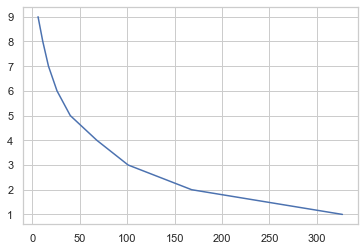

In [121]:
plt.plot([327, 168, 101, 68, 40, 26, 17, 11, 6], [1, 2, 3, 4,5,6,7,8,9])

In [113]:
# Include a prevalence filter of 10%, ASVs must be non-zero in 1:10
## Groupby Patients
total_patients = len(df_comp_ASV_sample.groupby('PatientID').sum())
non_zero_ASV_patients = df_comp_ASV_sample.groupby('PatientID').sum().astype(bool).sum(axis=0)
prevalence = 0.1
prev_filter = non_zero_ASV_patients/total_patients > prevalence

prev_filter = prev_filter.drop("Day")

df_diff_matrix = (df_diff_matrix.loc[:, prev_filter.values])

In [104]:
df_diff_matrix.shape

(986, 326)

In [42]:
df_diff_matrix.head()

,ASV_2,ASV_8,ASV_19,ASV_6,ASV_16,ASV_3,ASV_104,ASV_4,ASV_29,ASV_32,...,ASV_1322,ASV_2253,ASV_470,ASV_737,ASV_689,ASV_1764,ASV_3453,ASV_3432,ASV_265,ASV_1807
0,0,-0.0872995,-0.154779,-0.000711604,0.0295297,0,-0.323413,0,0.0707566,-0.0209412,...,0,0,0,0,0,0,0.00106339,0,0,0
1,-0.00105342,0.146833,0.158214,0.0024294,0,0,-0.344156,0,0,0.0221682,...,0,0,0,0,0,0,0,0,0,0
0,0.00214765,0.105697,-0.0311979,-0.552202,0.0114094,-0.0819822,0.00147651,0,0.0994043,0.0166443,...,0,0,0,0,0,0,0,0,0,0
1,-0.00116279,0.00358385,0.0330146,0.614483,0,0.0843983,0,0,0.000998403,0,...,0,0,0,0,0,0,0,0,0,0
0,-0.153811,-0.0501663,0.0253938,-0.000459137,0.0115484,0,-0.0306091,0,0.0238663,-0.00933578,...,0,0,0,0.00124105,0,0,0,0,0,0


In [44]:
# save unscaled csv
#df_diff_matrix.to_csv('df_diff_matrix.csv', index=False)

In [12]:
# Min-max scaling by ASVs 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_diff_matrix_t = pd.DataFrame(scaler.fit_transform(df_diff_matrix)) #scales ASV for S1_S2 and S2_S3

In [13]:
# Sanity check, each row max should be 1, and each row min should be 0

df_diff_matrix_t.transpose().apply(max, axis = 1).sum() # sum of max values in each row = 326
df_diff_matrix_t.transpose().apply(min, axis = 1).sum() # sum of min values in each row = 0

0.0

In [14]:
#Seperating S1_S2 and S2_S3 difference matrices
df_diff_matrix_S1_S2 = df_diff_matrix_t[::2].transpose() #subset all the even rows, S1_S2
df_diff_matrix_S2_S3 = df_diff_matrix_t[1::2].transpose() #subset all the odd rows, S2_S3


In [49]:
#creating new colanmes
mylist = df_comp_ASV_sample['PatientID'].unique()
colnames_S1_S2 = pd.Series([s + "_S1_S2" for s in mylist])
colnames_S2_S3 = pd.Series([s + "_S2_S3" for s in mylist])

df_diff_matrix_S1_S2.columns= colnames_S1_S2
df_diff_matrix_S2_S3.columns = colnames_S2_S3

#updating row indices to be ASVs
ASVs_labels = df_diff_matrix.columns
df_diff_matrix_S1_S2.index = ASVs_labels
df_diff_matrix_S2_S3.index = ASVs_labels

In [53]:
# saving ASV names
df_diff_matrix_S1_S2.to_csv('df_diff_matrix_S1_S2_min_max_scaled.csv', index=True)
df_diff_matrix_S2_S3.to_csv('df_diff_matrix_S2_S3_min_max_scaled.csv', index=True)

In [50]:
df_diff_matrix_S1_S2

,1000_S1_S2,1001_S1_S2,1002_S1_S2,1007_S1_S2,1008_S1_S2,1010_S1_S2,1012_S1_S2,pt_with_samples_1030_1031_1032_1033_1034_1035_1036_S1_S2,1036_S1_S2,103_S1_S2,...,FMT.0226_S1_S2,FMT.0227_S1_S2,FMT.0231_S1_S2,FMT.0232_S1_S2,FMT.0236_S1_S2,FMT.0237_S1_S2,FMT.0241_S1_S2,FMT.0242_S1_S2,FMT.0244_S1_S2,FMT.0245_S1_S2
ASV_2,0.569391,0.570631,0.480575,0.553609,0.573273,0.528860,0.570029,0.572630,0.716847,0.568411,...,0.454071,0.569242,0.569170,0.569391,0.569676,0.569391,0.563678,0.569552,0.569610,0.570559
ASV_8,0.442060,0.577698,0.468158,0.499813,0.565794,0.514191,0.557842,0.521748,0.418073,0.505133,...,0.528478,0.500214,0.501912,0.503882,0.501253,0.507107,0.347979,0.495177,0.501537,0.483658
ASV_19,0.494529,0.569414,0.603705,0.674461,0.590260,0.593186,0.512457,0.548032,0.597332,0.604767,...,0.601267,0.583881,0.512185,0.474322,0.577060,0.502554,0.583281,0.588177,0.593775,0.588980
ASV_6,0.575691,0.195320,0.575865,0.576354,0.569568,0.576933,0.577305,0.571509,0.585238,0.583499,...,0.550976,0.406037,0.574129,0.491860,0.551166,0.575372,0.571768,0.582904,0.578787,0.576607
ASV_16,0.699467,0.686229,0.686330,0.660351,0.702510,0.677893,0.664228,0.683657,0.430879,0.677893,...,0.679934,0.677893,0.677954,0.677893,0.678978,0.677893,0.681414,0.677893,0.677893,0.677893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASV_1764,0.489928,0.489928,0.489928,0.489928,0.489928,0.489928,0.489928,0.489928,0.489928,0.489928,...,0.489928,0.489928,0.493448,0.489928,0.489928,0.489928,0.489928,0.489928,0.489928,0.489928
ASV_3453,0.295632,0.222338,0.222338,0.222338,0.222338,0.222338,0.222338,0.222338,0.222338,0.222338,...,0.222338,0.222338,0.222338,0.222338,0.222338,0.222338,0.222338,0.222338,0.222338,0.222338
ASV_3432,0.670869,0.670869,0.670869,0.670869,0.670869,0.670869,0.670869,0.670869,0.674608,0.670869,...,0.670869,0.670869,0.670869,0.670869,0.670869,0.670869,0.670869,0.707851,0.670869,0.670869
ASV_265,0.493714,0.493714,0.493714,0.493714,0.493714,0.493714,0.493714,0.493714,0.498241,0.493714,...,0.493714,0.493714,0.496438,0.493714,0.493714,0.493714,0.493714,0.493714,0.493714,0.493714


# Creating distance matrix

In [17]:
from scipy.spatial.distance import pdist, squareform

In [18]:
dm = pdist(df_diff_matrix_S1_S2,'euclidean') 
dm2 = pdist(df_diff_matrix_S2_S3,'euclidean') 


In [19]:
dist_mat_S1_S2 = pd.DataFrame(squareform(dm))
dist_mat_S2_S3 = pd.DataFrame(squareform(dm2))

In [20]:
dist_mat_S1_S2.columns = ASVs_labels
dist_mat_S1_S2.index = ASVs_labels
dist_mat_S2_S3.columns = ASVs_labels
dist_mat_S2_S3.index = ASVs_labels

# Visualize Distance Matrics 

Inlcude bacterial families
Create same plot but use ASV Family Abundances

In [21]:
lut = dict(df_colors['HexColor'])


In [22]:
row_colors_S1_S2 = dist_mat_S1_S2.index.map(lut)
row_colors_S2_S3 = dist_mat_S2_S3.index.map(lut)

/Users/brian/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/brian/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:629: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


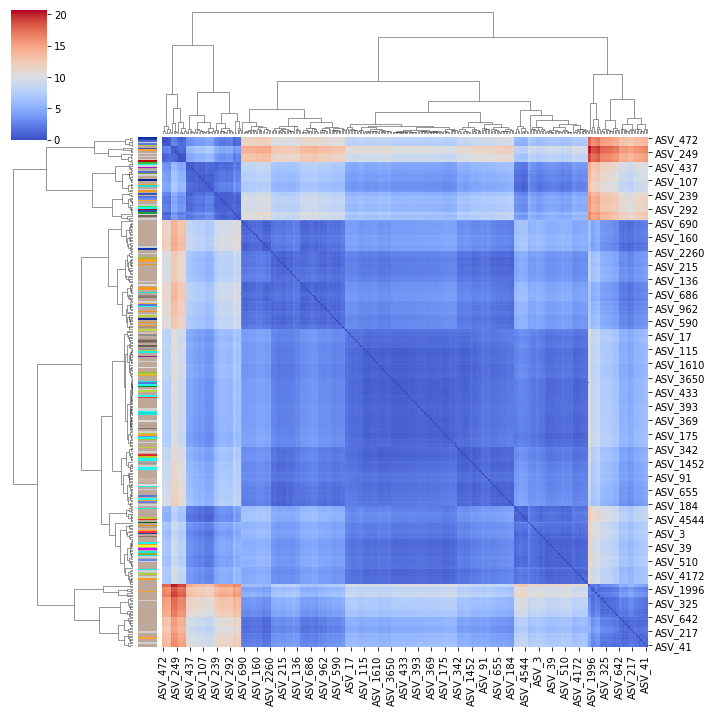

In [23]:
import seaborn as sns

g = sns.clustermap(dist_mat_S1_S2.iloc[:,:], cmap = 'coolwarm',row_colors = row_colors_S1_S2)

This heat map represents which ASVs are "traveling together". It is a distance matrix, measuring the distance between ASVs. Each ASV is made up of changes in relative abundances observed across all patients.

In [24]:
# Create a function to vary which taxonomical group to examine

In [25]:
from random import randint
TAX = 'Phylum'
temp= dict(df_ASV[TAX])
temp_groups = dist_mat_S1_S2.index.map(temp)


color = []
n = len(temp_groups.unique())

for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))
    
group_colors= dict(zip(temp_groups.unique(), color))

temp = df_ASV[TAX].map(group_colors)
row_colors1= dist_mat_S1_S2.index.map(temp)


In [26]:
temp

ASV
ASV_1        #88C505
ASV_10       #88C505
ASV_100      #4CDB6E
ASV_1000     #88C505
ASV_10000    #88C505
              ...   
ASV_9992     #88C505
ASV_9994     #88C505
ASV_9996     #88C505
ASV_9997     #88C505
ASV_9998     #C25B05
Name: Phylum, Length: 17650, dtype: object

In [27]:
#g = sns.clustermap(dist_mat_S1_S2.iloc[:,:], cmap = 'coolwarm',row_colors = row_colors1)

In [28]:
#g = sns.clustermap(dist_mat_S2_S3.iloc[:,:], cmap = 'coolwarm',row_colors = row_colors_S2_S3)

In [29]:
# Mantel test
# create a new distance matrix, 
# that measures how closely related ASVs are based on sequence data


In [30]:
from Levenshtein import distance as levdistance
from scipy.spatial.distance import pdist, squareform
df_mantel_S1_S2 = dist_mat_S1_S2.join(df_colors, how='inner') 
df_mantel_S1_S2 = df_mantel_S1_S2["Sequence"] # getting sequences for our 300 ASVs
df_mantel_S1_S2 = pd.DataFrame(df_mantel_S1_S2)
transformed_strings = np.array(df_mantel_S1_S2).reshape(-1, 1) 
mantel_dm_S1_S2 = pdist(transformed_strings, lambda x, y: levdistance(x[0], y[0]))
mantel_dm_S1_S2 = pd.DataFrame(squareform(mantel_dm_S1_S2))

In [31]:
# setting index and columns of levdistance matrice
mantel_dm_S1_S2.index = dist_mat_S1_S2.index
mantel_dm_S1_S2.columns = dist_mat_S1_S2.columns

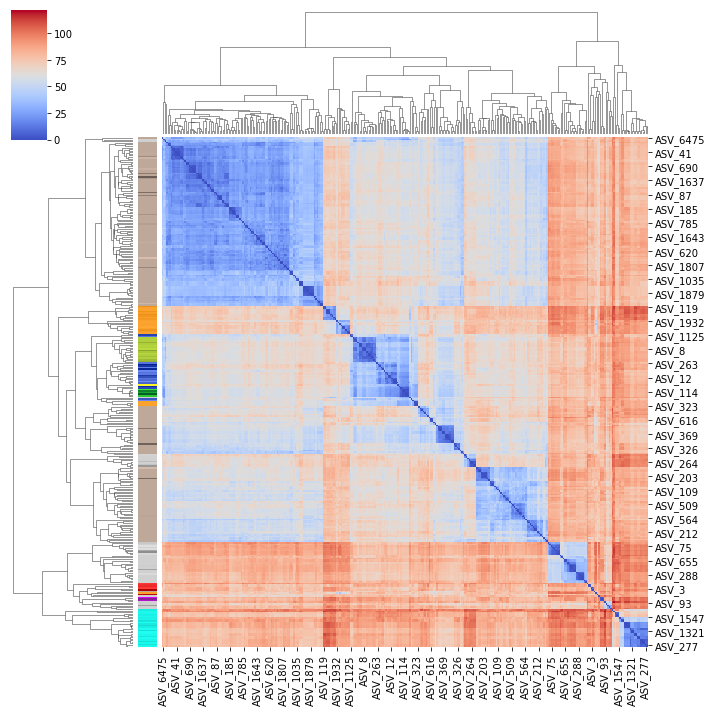

In [32]:
# visualization of levenshtein distance
g = sns.clustermap(mantel_dm_S1_S2.iloc[:,:], cmap = 'coolwarm',row_colors = row_colors_S1_S2)


In [33]:
np.all(mantel_dm_S1_S2.index== dist_mat_S1_S2.index)


True

In [34]:
# Mantel test
# Computes correlation between two distance matrices 
from skbio import DistanceMatrix
from skbio.stats.distance import mantel
coeff, p_value, n = mantel(mantel_dm_S1_S2, dist_mat_S1_S2)
print("Correlation: ",round(coeff, 4))
print("Pvalue:", p_value)



Correlation:  -0.0109
Pvalue: 0.721


In [35]:
# extracts cluster information
from scipy.spatial import distance
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

row_linkage = hierarchy.linkage(
    distance.pdist(dist_mat_S1_S2), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(dist_mat_S1_S2.T), method='average')

#sns.clustermap(dist_mat_S1_S2, row_linkage=row_linkage, col_linkage=col_linkage, row_colors=row_colors_S1_S2, 
#               method="average", figsize=(13, 13), cmap = "coolwarm")

# adjust t to vary the number of clusters. 
# assignation mostly depends on a distance threshold t - the maximum inter-cluster distance allowed
travel_clusters = fcluster(row_linkage, t=50, criterion='distance')



In [36]:
import copy
t1 = pd.DataFrame(travel_clusters)
#t2 = pd.DataFrame(dist_mat_S1_S2.index)
temp = copy.deepcopy(dist_mat_S1_S2)
t1.index = dist_mat_S1_S2.index
temp.insert(0, 'Travel_Cluster', t1)

/Users/brian/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/brian/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:629: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


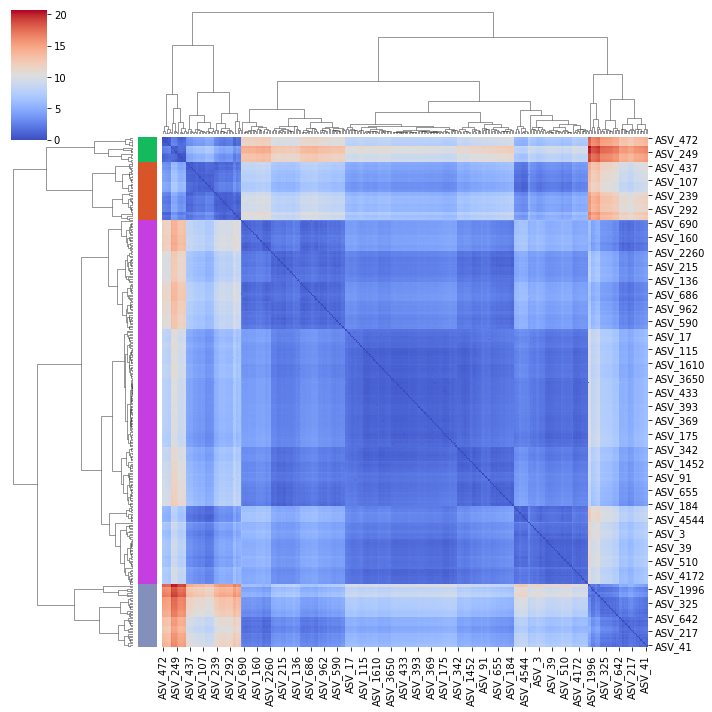

In [38]:
import random
random.seed(0)
# visualizing the travel_clusters on the original graph
temp1= dict(temp["Travel_Cluster"]) #cluster 1 and cluster 4 are most different
temp_groups = dist_mat_S1_S2.index.map(temp1)


color = []
n = len(temp_groups.unique())


for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))
    
group_colors= dict(zip(temp_groups.unique(), color))

temp1 = temp["Travel_Cluster"].map(group_colors)
row_colors_temp1= dist_mat_S1_S2.index.map(temp1)

g = sns.clustermap(dist_mat_S1_S2.iloc[:,:], cmap = 'coolwarm',row_colors = row_colors_temp1)

In [143]:
# cluster heatmap for group 4 and group 1, the two most dissimilar groups

x1 = temp[temp["Travel_Cluster"] == (4)]
x2 = temp[temp["Travel_Cluster"] == (1)]
travel_clust_1_4= pd.concat([x1, x2])
keep = travel_clust_1_4.index
travel_clust_1_4 = travel_clust_1_4[keep]



KeyError: 'Travel_Cluster'

In [122]:
# levenstien distance for subset
# mantel test between levenstien distance and subset

df_mantel_S1_S2_travel_1_4 = travel_clust_1_4.join(df_colors, how='inner') 
df_mantel_S1_S2_travel_1_4 = df_mantel_S1_S2_travel_1_4["Sequence"] # getting sequences for our 300 ASVs
df_mantel_S1_S2_travel_1_4 = pd.DataFrame(df_mantel_S1_S2_travel_1_4)
transformed_strings = np.array(df_mantel_S1_S2_travel_1_4).reshape(-1, 1) 
mantel_dm_S1_S2 = pdist(transformed_strings, lambda x, y: levdistance(x[0], y[0]))
mantel_dm_S1_S2 = pd.DataFrame(squareform(mantel_dm_S1_S2))



In [1]:
mantel_dm_S1_S2

NameError: name 'mantel_dm_S1_S2' is not defined

Correlation:  0.2191
Pvalue: 0.005


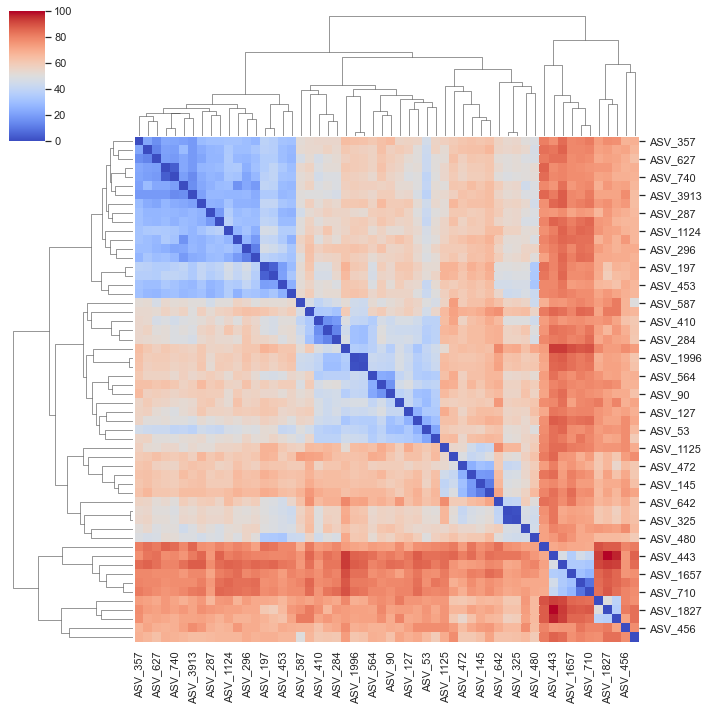

In [150]:
# setting index and columns of levdistance matrice
mantel_dm_S1_S2.index = travel_clust_1_4.index
mantel_dm_S1_S2.columns = travel_clust_1_4.columns
# visualization of levenshtein distance
g = sns.clustermap(mantel_dm_S1_S2.iloc[:,:], cmap = 'coolwarm')

coeff, p_value, n = mantel(mantel_dm_S1_S2, travel_clust_1_4)
print("Correlation: ",round(coeff, 4))
print("Pvalue:", p_value)



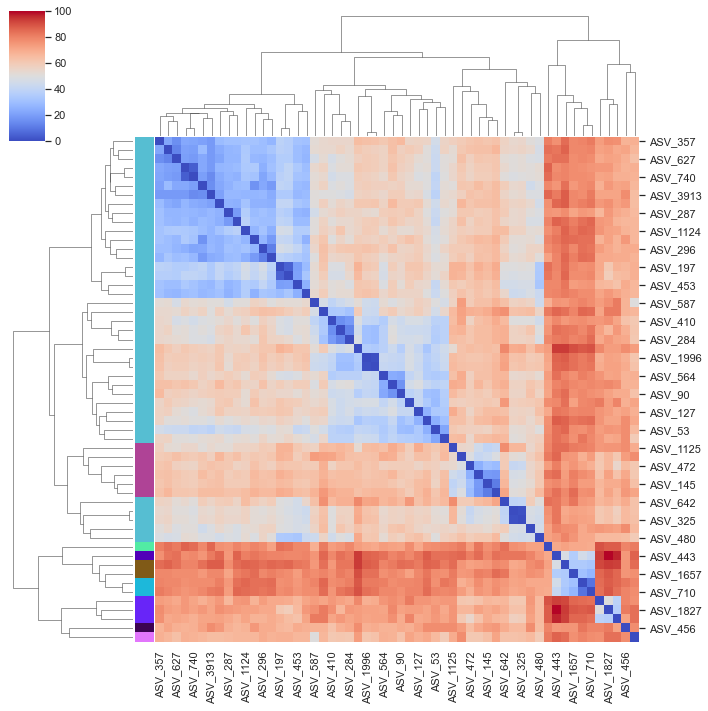

In [148]:
# generate row_colors based on TAX
from random import randint
TAX = 'Order'
temp= dict(df_ASV[TAX])
temp_groups = mantel_dm_S1_S2.index.map(temp)


color = []
n = len(temp_groups.unique())

for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))
    
group_colors= dict(zip(temp_groups.unique(), color))

temp = df_ASV[TAX].map(group_colors)
row_colors1= mantel_dm_S1_S2.index.map(temp)

g = sns.clustermap(mantel_dm_S1_S2.iloc[:,:], cmap = 'coolwarm', row_colors = row_colors1)


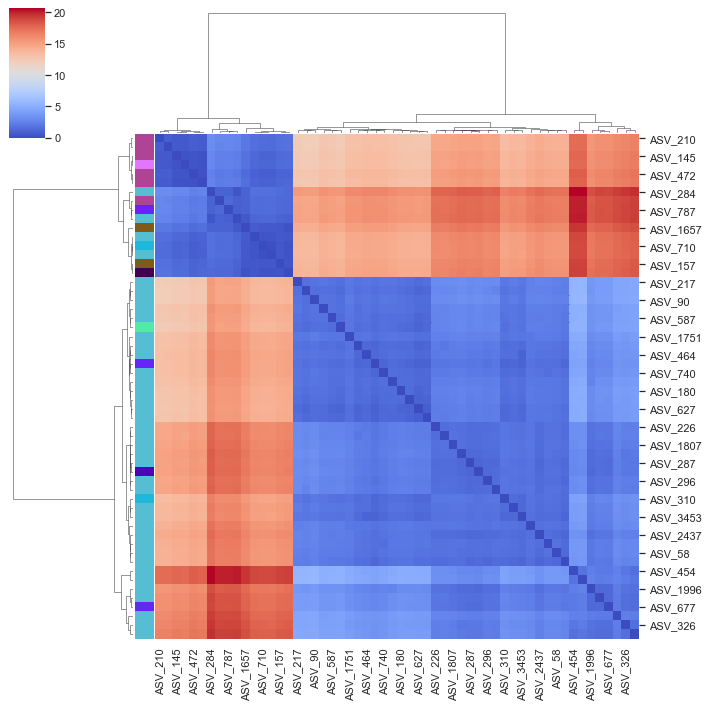

In [149]:
g = sns.clustermap(travel_clust_1_4.iloc[:,:], cmap = 'coolwarm', row_colors = row_colors1)

In [98]:
df_tax[df_tax["ASV"].isin(x1.index)]['Genus'] 



537              Lachnospiraceae NK4A136 group
1107                          Negativibacillus
3397     [Eubacterium] coprostanoligenes group
3620                [Eubacterium] hallii group
3679                             <not present>
3816                              Holdemanella
4269                [Eubacterium] hallii group
4304                            Butyricicoccus
4647                             Oscillibacter
4827                             <not present>
5090                             <not present>
5429                          Faecalibacterium
5933                                 Roseburia
6092                                     Dorea
6292                                    Rothia
6323                            Butyricicoccus
6605                            Clostridioides
6625               Clostridium sensu stricto 1
6920                         Ruminiclostridium
7037                             <not present>
7937                                   Blautia
8206         

In [99]:
df_tax[df_tax["ASV"].isin(x2.index)]['Genus'] 



541                          Leuconostoc
905                        Lactobacillus
2010                       Lactobacillus
2685                         Actinomyces
3065                               F0332
4335                       Streptococcus
4597                       Lactobacillus
5125                       Cuneatibacter
5522     [Ruminococcus] gauvreauii group
5921                       <not present>
9071                     Acidaminococcus
9534                           Bilophila
10104                        Abiotrophia
10471                         Catabacter
16313                             Rothia
16832                         Holdemania
Name: Genus, dtype: object

In [63]:
df_tax[df_tax["ASV"].isin(x1.index)]['Order'] #obligate anerobes , mostly Clostridiales


537           Clostridiales
1107          Clostridiales
3397          Clostridiales
3620          Clostridiales
3679          Clostridiales
3816     Erysipelotrichales
4269          Clostridiales
4304          Clostridiales
4647          Clostridiales
4827          Clostridiales
5090          Clostridiales
5429          Clostridiales
5933          Clostridiales
6092          Clostridiales
6292          Micrococcales
6323          Clostridiales
6605          Clostridiales
6625          Clostridiales
6920          Clostridiales
7037          Clostridiales
7937          Clostridiales
8206          Clostridiales
8454          Clostridiales
8455          Clostridiales
9097      Corynebacteriales
9423          Clostridiales
9454          Clostridiales
9794          Clostridiales
11639         Clostridiales
12284         Clostridiales
12953         Clostridiales
13697         Clostridiales
14094         Clostridiales
15077         Clostridiales
15459         Clostridiales
16041    Erysipelotr

In [64]:
df_tax[df_tax["ASV"].isin(x2.index)]['Order'] #more diverse

541         Lactobacillales
905         Lactobacillales
2010        Lactobacillales
2685        Actinomycetales
3065        Actinomycetales
4335        Lactobacillales
4597        Lactobacillales
5125          Clostridiales
5522          Clostridiales
5921          Clostridiales
9071        Selenomonadales
9534     Desulfovibrionales
10104       Lactobacillales
10471         Clostridiales
16313         Micrococcales
16832    Erysipelotrichales
Name: Order, dtype: object

In [55]:
travel_clust_1_4.index

Index(['ASV_58', 'ASV_1827', 'ASV_357', 'ASV_564', 'ASV_326', 'ASV_404',
       'ASV_296', 'ASV_41', 'ASV_197', 'ASV_587', 'ASV_310', 'ASV_180',
       'ASV_1751', 'ASV_226', 'ASV_509', 'ASV_90', 'ASV_325', 'ASV_53',
       'ASV_212', 'ASV_627', 'ASV_2437', 'ASV_217', 'ASV_1996', 'ASV_98',
       'ASV_642', 'ASV_287', 'ASV_3139', 'ASV_443', 'ASV_410', 'ASV_464',
       'ASV_1124', 'ASV_740', 'ASV_454', 'ASV_127', 'ASV_3913', 'ASV_453',
       'ASV_677', 'ASV_799', 'ASV_3453', 'ASV_1807', 'ASV_145', 'ASV_472',
       'ASV_210', 'ASV_12', 'ASV_1125', 'ASV_202', 'ASV_157', 'ASV_230',
       'ASV_456', 'ASV_442', 'ASV_710', 'ASV_787', 'ASV_1657', 'ASV_284',
       'ASV_480', 'ASV_249'],
      dtype='object')

In [65]:
temp_mean = temp.groupby(by = "Travel_Cluster").mean()

In [66]:
temp_mean.T

Travel_Cluster,1,2,3,4
ASV_2,8.565700,4.759021,3.395343,7.825918
ASV_8,9.400161,5.371160,2.605638,6.669471
ASV_19,7.352293,3.414354,3.289570,8.543758
ASV_6,7.723536,3.800651,3.181728,8.256493
ASV_16,5.332845,1.842533,4.889525,10.483989
...,...,...,...,...
ASV_1764,9.199978,5.059137,1.978851,6.519268
ASV_3453,15.097555,10.925623,5.424969,1.923059
ASV_3432,5.225547,1.674988,4.902083,10.530074
ASV_265,9.168859,5.049315,2.119934,6.611467


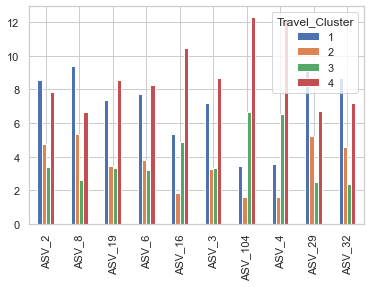

In [69]:

import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame(temp_mean.T.iloc[0:10,])
df.plot(kind='bar')
plt.show()